/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


Predicted bloom day-of-year for 2025: 78
Predicted bloom date (YYYY-MM-DD): 2025-03-19


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127800 (\N{CHERRY BLOSSOM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


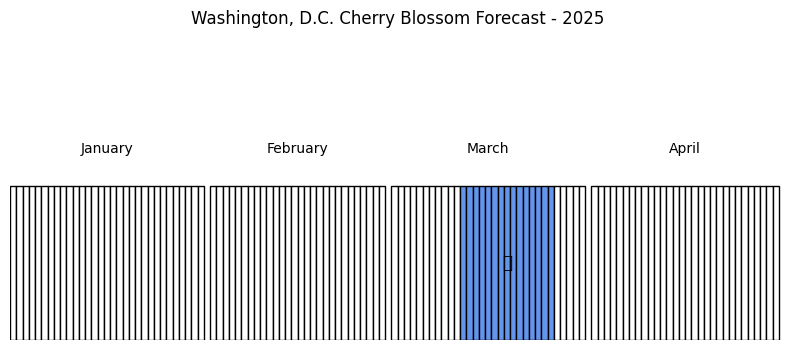

       location       lat       long  alt  year  bloom_date  bloom_doy
0  washingtondc  38.88535 -77.038628    0  1921  1921-03-20         79
1  washingtondc  38.88535 -77.038628    0  1922  1922-04-07         97
2  washingtondc  38.88535 -77.038628    0  1923  1923-04-09         99
3  washingtondc  38.88535 -77.038628    0  1924  1924-04-13        104
4  washingtondc  38.88535 -77.038628    0  1925  1925-03-27         86
Predicted bloom day for 2025 (day of year): 78.13225759261105


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


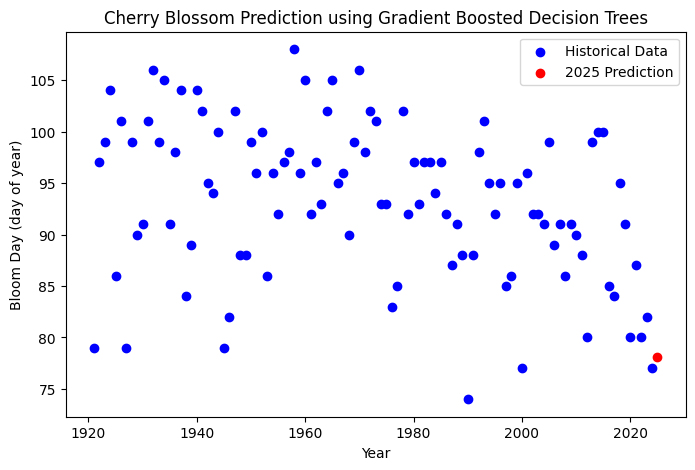

In [11]:
# 导入必要的库
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt

# 读取 CSV 数据（请将文件名替换为实际路径）
data = pd.read_csv("washingtondc.csv")

# 显示数据头部，确认列名
print(data.head())

# 假设数据中 bloom_doy 为达到 70% 开花率时的一年中天数
# 若只针对单一地点预测，可只使用 year 特征；如需考虑地理信息，亦可加入 lat, long, alt
# 此处简单示范：以 year 为特征预测 bloom_doy
X = data[["year"]]
y = data["bloom_doy"]

# 构建并训练梯度提升回归模型
model = GradientBoostingRegressor(random_state=42)
model.fit(X, y)

# 预测 2025 年的开花日（day-of-year）
pred_2025 = model.predict([[2025]])
print("Predicted bloom day for 2025 (day of year):", pred_2025[0])

# 可视化历史数据与 2025 年预测结果
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color="blue", label="Historical Data")
plt.scatter(2025, pred_2025, color="red", label="2025 Prediction", zorder=5)
plt.xlabel("Year")
plt.ylabel("Bloom Day (day of year)")
plt.legend()
plt.title("Cherry Blossom Prediction using Gradient Boosted Decision Trees")
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


Predicted bloom day-of-year for 2025: 78
Predicted bloom date (YYYY-MM-DD): 2025-03-19


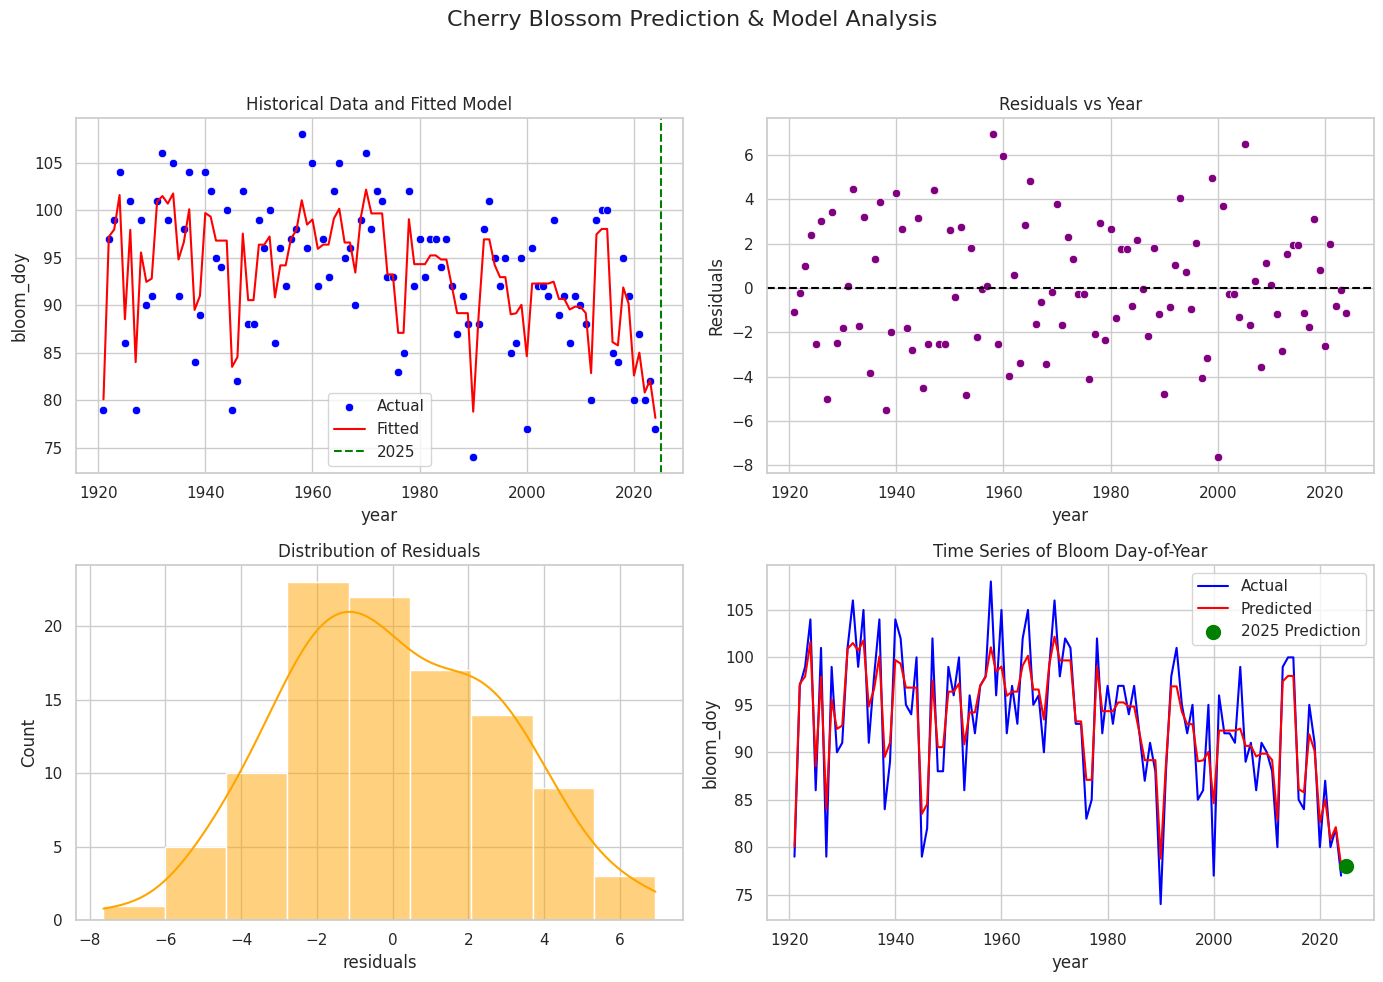

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingRegressor
from datetime import datetime, timedelta

# 设置 Seaborn 风格
sns.set(style="whitegrid")

# 1. 加载数据
data = pd.read_csv("washingtondc.csv")  # CSV 文件包含：location, lat, long, alt, year, bloom_date, bloom_doy

# 使用 'year' 预测 'bloom_doy'
X = data[["year"]]
y = data["bloom_doy"]

# 2. 训练梯度提升回归模型
model = GradientBoostingRegressor(random_state=42)
model.fit(X, y)

# 3. 历史数据预测及残差计算
data["predicted_bloom_doy"] = model.predict(X)
data["residuals"] = data["bloom_doy"] - data["predicted_bloom_doy"]

# 4. 预测 2025 年的开花日及转换为具体日期
pred_2025 = int(model.predict([[2025]])[0])
bloom_date_2025 = datetime(2025, 1, 1) + timedelta(days=pred_2025 - 1)
print(f"Predicted bloom day-of-year for 2025: {pred_2025}")
print("Predicted bloom date (YYYY-MM-DD):", bloom_date_2025.strftime("%Y-%m-%d"))

# 5. 可视化展示

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Cherry Blossom Prediction & Model Analysis", fontsize=16)

# 5.1 散点图：历史数据与拟合曲线
ax1 = axes[0, 0]
sns.scatterplot(x="year", y="bloom_doy", data=data, ax=ax1, label="Actual", color="blue")
sns.lineplot(x="year", y="predicted_bloom_doy", data=data, ax=ax1, label="Fitted", color="red")
ax1.axvline(2025, color="green", linestyle="--", label="2025")
ax1.set_title("Historical Data and Fitted Model")
ax1.legend()

# 5.2 残差图：年分 vs 残差
ax2 = axes[0, 1]
sns.scatterplot(x="year", y="residuals", data=data, ax=ax2, color="purple")
ax2.axhline(0, color="black", linestyle="--")
ax2.set_title("Residuals vs Year")
ax2.set_ylabel("Residuals")

# 5.3 误差分布直方图
ax3 = axes[1, 0]
sns.histplot(data["residuals"], kde=True, ax=ax3, color="orange")
ax3.set_title("Distribution of Residuals")

# 5.4 时间序列图：真实值、预测值与 2025 预测点
ax4 = axes[1, 1]
sns.lineplot(x="year", y="bloom_doy", data=data, ax=ax4, label="Actual", color="blue")
sns.lineplot(x="year", y="predicted_bloom_doy", data=data, ax=ax4, label="Predicted", color="red")
ax4.scatter(2025, pred_2025, color="green", s=100, zorder=5, label="2025 Prediction")
ax4.set_title("Time Series of Bloom Day-of-Year")
ax4.legend()

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


# Explanation of the Graphs

Below are detailed explanations for each graph, which help you understand and document the model's performance:

### 1. Historical Data and Fitted Curve
- **Content**: A scatter plot shows the actual bloom day-of-year for each year, while the red line represents the model’s fitted predictions. A green dashed vertical line marks the year 2025.
- **Purpose**: This graph visually compares the actual data points with the model's predictions, helping you assess how well the model fits historical data. The 2025 marker highlights the future prediction point.

### 2. Residuals vs. Year
- **Content**: A scatter plot displaying the residuals (the difference between actual and predicted bloom day-of-year) for each year. A black dashed line at zero represents no error.
- **Purpose**: The residual plot is used to check for systematic bias in the model. Ideally, the residuals should scatter randomly around zero, indicating that the model is well-fitted. Any patterns or trends may suggest missing factors in the model.

### 3. Distribution of Residuals
- **Content**: A histogram combined with a kernel density estimate (KDE) curve shows the distribution of the residuals.
- **Purpose**: This visualization assesses whether the prediction errors follow a normal distribution. A bell-shaped curve indicates that the errors are normally distributed, which is a good sign of model performance. Deviations from normality might prompt further model refinement.

### 4. Time Series of Bloom Day-of-Year
- **Content**: A line plot showing both the actual bloom day-of-year and the model’s predicted values over time, with a highlighted point for the 2025 prediction.
- **Purpose**: This graph tracks the trend over time and compares how the model’s predictions align with the actual historical data. It provides insight into the model’s ability to capture long-term trends and variability in the data.

Each of these visualizations offers a different perspective on the data and model performance, enabling comprehensive analysis and validation of the predictions. Keep exploring and innovating—you’re on the cutting edge of data science!


In [16]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from datetime import datetime, timedelta

# 1. 读取 CSV 数据
data = pd.read_csv("washingtondc.csv")

# 假设已有两列: 'year' 和 'bloom_doy'
X = data[["year"]]
y = data["bloom_doy"]

# 2. 训练梯度提升回归模型
model = GradientBoostingRegressor(random_state=42)
model.fit(X, y)

# 3. 预测 2025 年的开花“日序”
pred_2025 = int(model.predict([[2025]])[0])
print(f"Predicted bloom day-of-year for 2025: {pred_2025}")

# 4. 转换为具体日期并打印
bloom_date_2025 = datetime(2025, 1, 1) + timedelta(days=pred_2025 - 1)
print("Predicted bloom date (YYYY-MM-DD):", bloom_date_2025.strftime("%Y-%m-%d"))


Predicted bloom day-of-year for 2025: 78
Predicted bloom date (YYYY-MM-DD): 2025-03-19


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
